In [ ]:
import ant_colony as aco
import matplotlib.pyplot as plt
import math

# "Drone viajante" Alagoas

- ### CRIAR GRAFO CONSIDERANDO OS MUNICÍPIOS DE ALAGOAS
O arquivo alagoas_TSP.txt (em anexo) possui as latitudes e longitudes (em graus) dos municípios de Alagoas. O primeiro passo desta atividade é ler este arquivo e criar um dicionário de dados que seja compatível com o que a implementação do ACO espera. Cada município do estado deverá ser um vértice (nó).

{0: (-9.66599, -35.735), 1: (-9.262, -37.938), 2: (-9.68489, -36.3078), 3: (-9.75487, -36.6615), 4: (-9.5119, -36.0086), 5: (-9.4023, -35.5101), 6: (-9.83842, -35.9057), 7: (-9.6742, -37.133), 8: (-9.57047, -36.4904), 9: (-9.82272, -37.277), 10: (-9.64308, -36.2125), 11: (-9.23342, -36.0162), 12: (-9.40121, -36.9911), 13: (-9.3994, -36.1559), 14: (-8.84723, -35.5685), 15: (-9.78451, -36.3525), 16: (-9.95542, -36.7926), 17: (-9.11932, -37.5967), 18: (-9.41504, -36.0826), 19: (-9.48476, -37.3773), 20: (-9.2556, -36.2983), 21: (-9.63348, -36.5845), 22: (-8.91806, -35.7214), 23: (-9.63715, -35.7994), 24: (-10.1276, -36.1717), 25: (-9.6178, -36.7697), 26: (-9.38465, -37.0965), 27: (-9.39089, -36.7644), 28: (-9.89859, -36.6815), 29: (-10.2935, -36.3028), 30: (-9.27281, -35.7139), 31: (-9.88404, -36.8316), 32: (-8.97823, -35.9373), 33: (-9.53768, -36.6372), 34: (-10.1235, -36.6597), 35: (-9.22594, -37.7509), 36: (-9.63545, -37.2076), 37: (-8.83951, -35.4591), 38: (-9.08746, -35.2634), 39: (-9

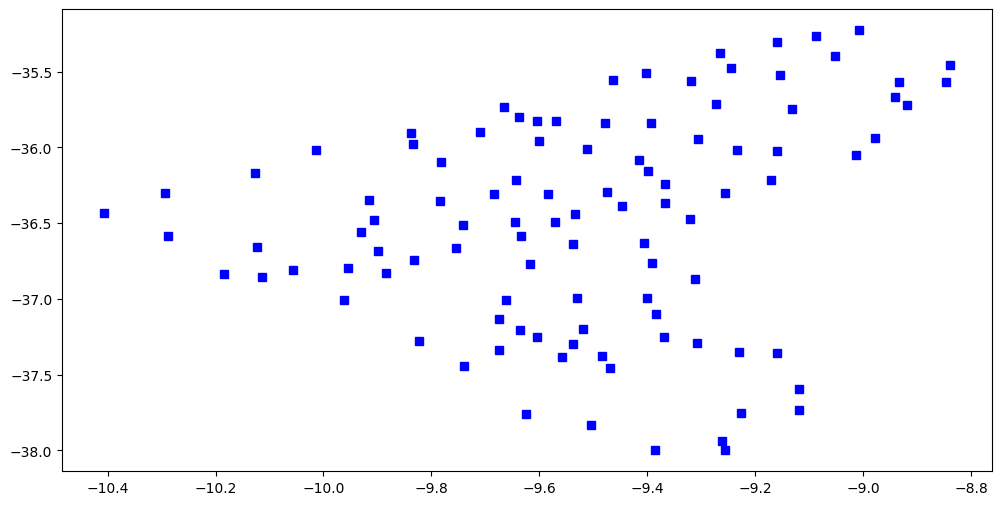

In [ ]:
alagoas_cities = {}
alagoas_cities_names = []
with open('alagoas_TSP.txt') as file:
  lines = file.readlines()
  lines.pop(0)
  for i, line in enumerate(lines):
    values = line.strip().split("\t")
    city = values[0]
    latitude = float(values[1].replace(',', '.'))
    longitude = float(values[2].replace(',', '.'))
    alagoas_cities_names.append(city)
    alagoas_cities[i] = (latitude, longitude)

x = []
y = []
for city in alagoas_cities.keys():
	x.append(alagoas_cities[city][0])
	y.append(alagoas_cities[city][1])

print(alagoas_cities)

plt.figure(figsize=(12, 6))
plt.plot(x, y,'bs')
plt.show()

- ### REPRODUZIR CÓDIGO DE EXECUÇÃO COM OS MUNICÍPIOS
A segunda parte da atividade é alterar o notepad ACO_TSP_Example.ipynb para resolver o problema do caixeiro viajante considerando Maceió como a cidade inicial. O algoritmo deve imprimir um gráfico com um linha que ligue os vértices e represente o melhor caminho encontrado, e também deve imprimir a lista dos nomes dos munícipios na ordem em que foram visitados (Maceió deverá ser o primeiro).

In [ ]:
def distance(start, end):
	x_distance = abs(start[0] - end[0])
	y_distance = abs(start[1] - end[1])
	return math.sqrt(pow(x_distance, 2) + pow(y_distance, 2))

colony = aco.ant_colony(alagoas_cities, distance)
answer = colony.mainloop()

for city_index in answer:
  print(alagoas_cities_names[city_index])

Maceió
Barra de Santo Antônio
Pilar
Atalaia
Rio Largo
Messias
Coqueiro Seco
Santa Luzia do Norte
Satuba
Joaquim Gomes
São Miguel dos Milagres
Passo de Camaragibe
Ibateguara
São José da Laje
União dos Palmares
Branquinha
Cajueiro
Capela
Viçosa
Tanque d'Arca
Paulo Jacinto
Chã Preta
Maribondo
Anadia
Campo Alegre
Coruripe
Quebrangulo
Craíbas
São Sebastião
Feira Grande
Lagoa da Canoa
Girau do Ponciano
Campo Grande
São Brás
Porto Real do Colégio
Igreja Nova
Arapiraca
Igaci
Traipu
Penedo
Piaçabuçu
Feliz Deserto
Teotônio Vilela
Junqueiro
Limoeiro de Anadia
Taquarana
Belém
Boca da Mata
Pindoba
Mar Vermelho
Palmeira dos Índios
Cacimbinhas
Maravilha
Ouro Branco
Poço das Trincheiras
Santana do Ipanema
Olho d'Água das Flores
Jacaré dos Homens
Monteirópolis
Olivença
Minador do Negrão
Estrela de Alagoas
Carneiros
Senador Rui Palmeira
Canapi
Inhapi
Mata Grande
Água Branca
Pariconha
Delmiro Gouveia
Olho d'Água do Casado
Piranhas
Pão de Açúcar
Jaramataia
Major Isidoro
Batalha
Belo Monte
Palestina
Dois R

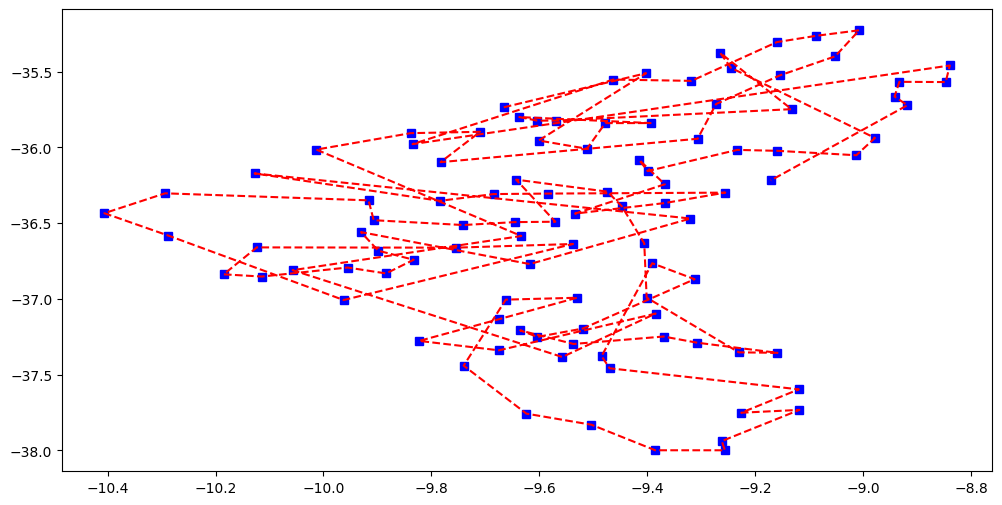

In [ ]:
x2 = []
y2 = []
for key in answer:
	x2.append(alagoas_cities[key][0])
	y2.append(alagoas_cities[key][1])

plt.figure(figsize=(12, 6))
plt.plot(x, y, 'bs', x2, y2, 'r--')
plt.show()

- ### ALTERAR O CÁLCULO DA DISTÂNCIA
Uma forma mais precisa de calcular distância neste contexto de cidades é a fórmula de Haversine para distância [d = 2 * r *arcsin(...); vide wikipedia]. A última parte da atividade é executar o ACO utilizando a fórmula de Haversine ao invés da distância euclidiana.

In [ ]:
def haversine(start, end):
    start_latitude = math.radians(start[0])
    start_longitude = math.radians(start[1])
    end_latitude = math.radians(end[0])
    end_longitude = math.radians(end[1])

    earth_radius = 6371.0

    latitude_distance = end_latitude - start_latitude
    longitude_distance = end_longitude - start_longitude

    a = (math.sin(latitude_distance/2)**2) + (math.cos(start_latitude) * math.cos(end_latitude)) * (math.sin(longitude_distance/2)**2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distance = earth_radius * c

    return distance

colony = aco.ant_colony(alagoas_cities, haversine)
answer = colony.mainloop()

for city_index in answer:
  print(alagoas_cities_names[city_index])

Maceió
Atalaia
Joaquim Gomes
Novo Lino
Barra de Santo Antônio
Paripueira
São Luís do Quitunde
Passo de Camaragibe
Matriz de Camaragibe
Colônia Leopoldina
Jundiá
Campestre
Jacuípe
Maragogi
Porto de Pedras
Porto Calvo
Japaratinga
São Miguel dos Milagres
Estrela de Alagoas
Anadia
Coité do Nóia
Belém
Tanque d'Arca
Viçosa
Paulo Jacinto
Mar Vermelho
Cajueiro
Pindoba
São Miguel dos Campos
Boca da Mata
Branquinha
Murici
Capela
Rio Largo
Satuba
Santa Luzia do Norte
Coqueiro Seco
Marechal Deodoro
Barra de São Miguel
Roteiro
Pilar
Flexeiras
São José da Laje
União dos Palmares
Ibateguara
Messias
Junqueiro
Campo Alegre
Maribondo
Santana do Mundaú
Chã Preta
Palmeira dos Índios
Igaci
Quebrangulo
Taquarana
Limoeiro de Anadia
São Sebastião
Feira Grande
Lagoa da Canoa
Traipu
Olho d'Água Grande
São Brás
Craíbas
Major Isidoro
Cacimbinhas
Jaramataia
Batalha
Monteirópolis
Jacaré dos Homens
Olho d'Água das Flores
Olivença
Palestina
Pão de Açúcar
Delmiro Gouveia
Água Branca
Pariconha
Ouro Branco
Maravilha
San

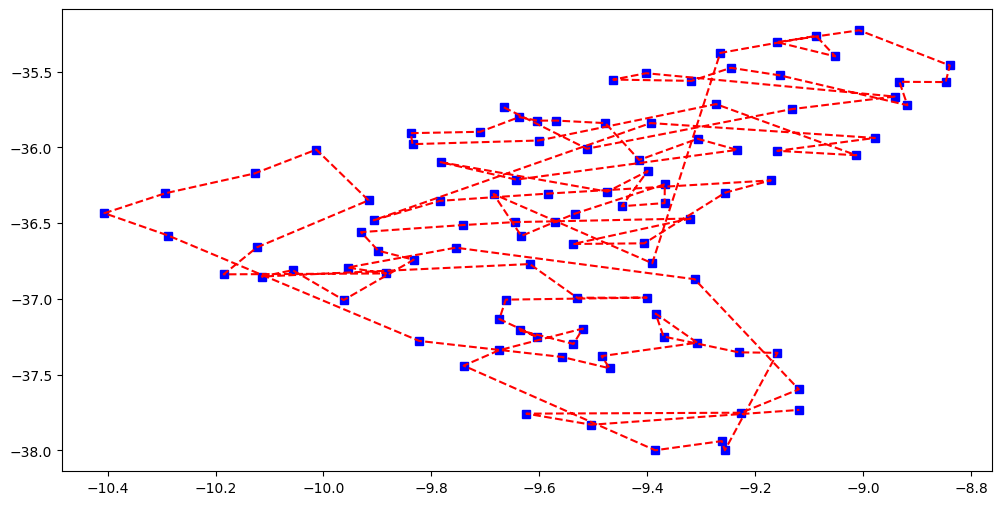

In [ ]:
x2 = []
y2 = []
for key in answer:
	x2.append(alagoas_cities[key][0])
	y2.append(alagoas_cities[key][1])

plt.figure(figsize=(12, 6))
plt.plot(x, y, 'bs', x2, y2, 'r--')
plt.show()